# Classic approach to camera calibration  
Source: [OpenCV Docs](https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html)

In [1]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

def show_image(img, title=""):
    if len(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

    plt.axis('off')
    if title != "":
        plt.title(title)
    plt.show()

CAMERA_IMGS_PATH = os.path.abspath("camera_calibration_imgs") 

  0%|          | 0/10 [00:00<?, ?it/s]

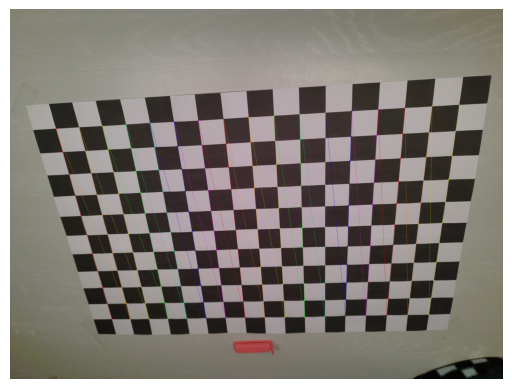

 10%|█         | 1/10 [00:04<00:36,  4.02s/it]

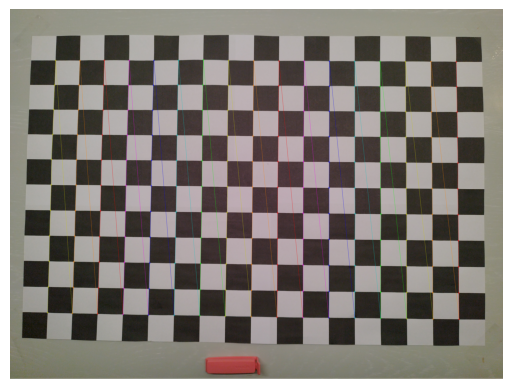

 20%|██        | 2/10 [00:07<00:28,  3.54s/it]

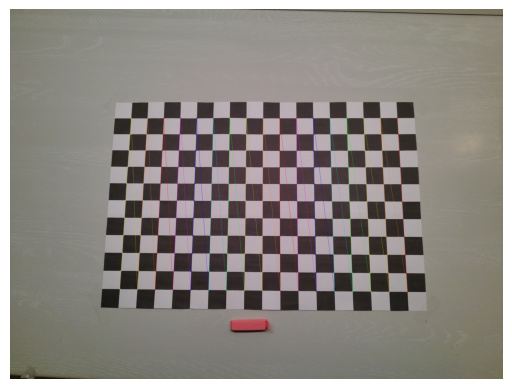

 30%|███       | 3/10 [00:10<00:25,  3.59s/it]

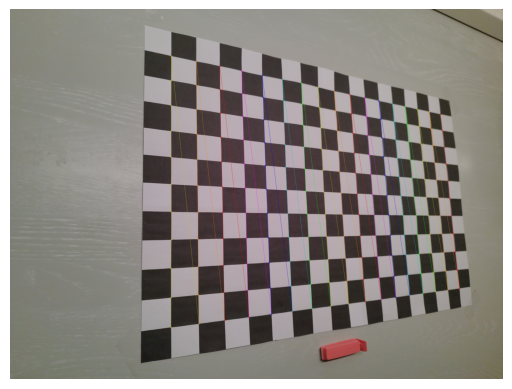

 40%|████      | 4/10 [00:13<00:20,  3.40s/it]

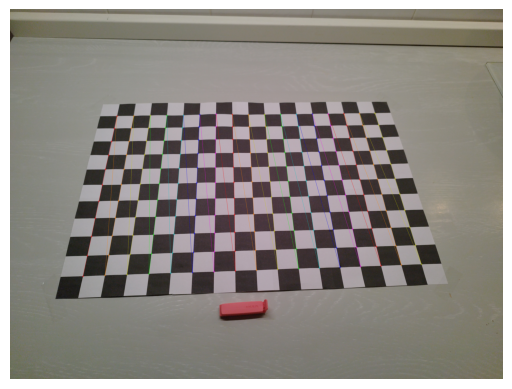

 50%|█████     | 5/10 [00:17<00:17,  3.44s/it]

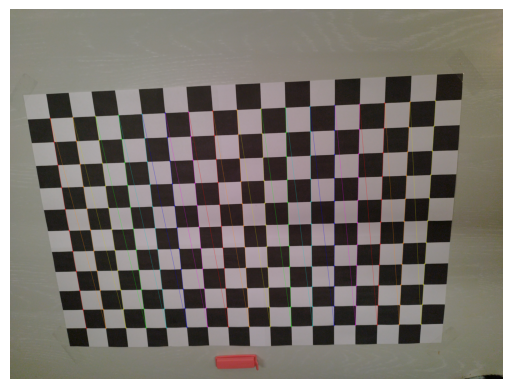

 60%|██████    | 6/10 [00:21<00:14,  3.61s/it]

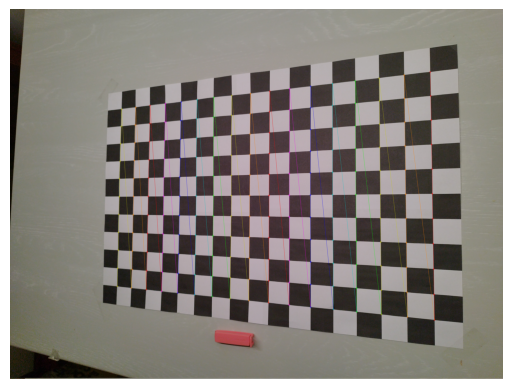

 70%|███████   | 7/10 [00:24<00:10,  3.55s/it]

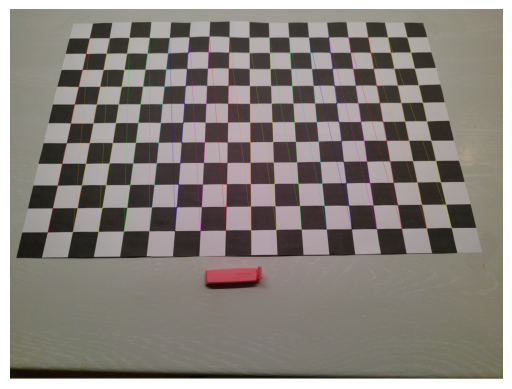

 80%|████████  | 8/10 [00:28<00:07,  3.50s/it]

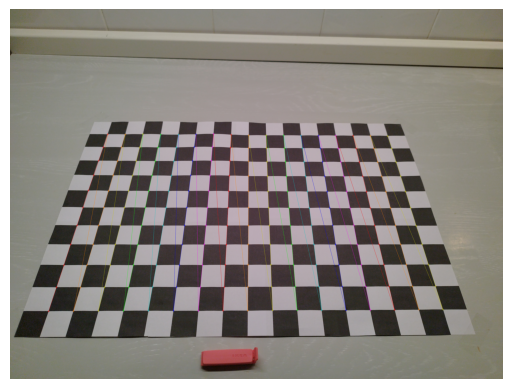

 90%|█████████ | 9/10 [00:31<00:03,  3.50s/it]

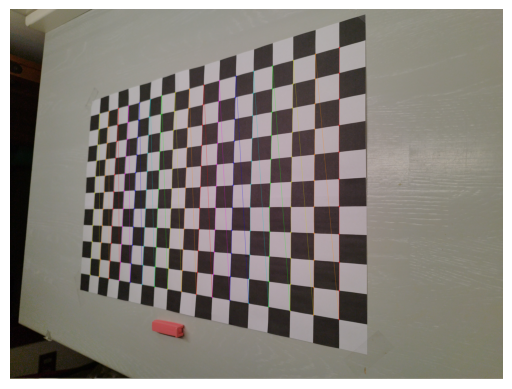

100%|██████████| 10/10 [00:35<00:00,  3.54s/it]


In [2]:
pattern_size = (11, 17)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Prepare object points (0,0,0), (1,0,0), (2,0,0), ..., (7,5,0)
objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0 : pattern_size[0], 0 : pattern_size[1]].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images.
obj_points = []  # 3d point in real world space
img_points = []  # 2d points in image plane.

calibration_images = glob.glob("*.jpg", root_dir=CAMERA_IMGS_PATH)

for fname in tqdm(calibration_images):
    img = cv2.imread(os.path.join(CAMERA_IMGS_PATH, fname))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCornersSB(gray, pattern_size)

    if ret:
        obj_points.append(objp)

        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        img_points.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, pattern_size, corners2, ret)
        show_image(img)

In [3]:
# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

# # Save calibration parameters
# np.savez('calibration_parameters.npz', mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)


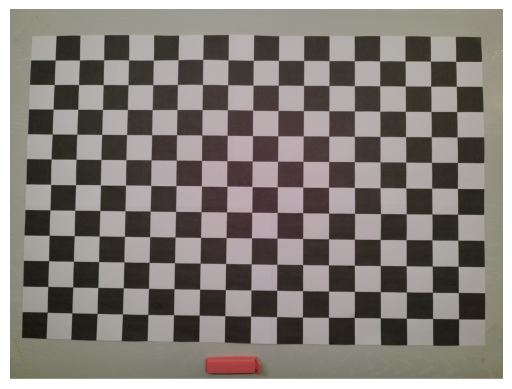

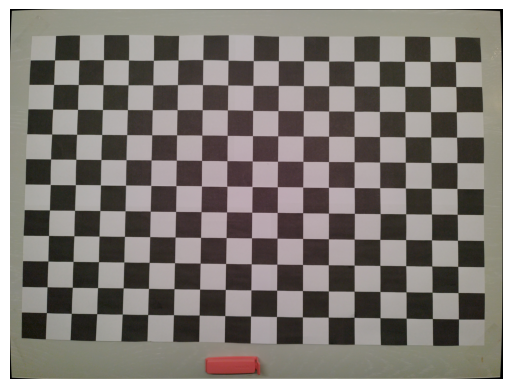

In [16]:
h,  w = img.shape[:2]

newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))


img = cv2.imread(os.path.join(CAMERA_IMGS_PATH, "1.jpg"))  # Replace with the path to your distorted image

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]


# Correct lens distortion
# undistorted_img = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite("not-undistorted.jpg",img)
cv2.imwrite("undistorted.jpg",dst)

show_image(img)
show_image(dst)
